In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus4'

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

best_emp 7
Vaikutus työllisyyteen keskiarvo 2066869 htv, mediaani 2067461 htv std 5763 htv
   keskiarvo 2231803 työllistä, mediaani 2231670 työllistä, std 6426 työllistä


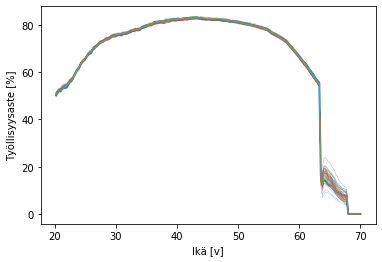

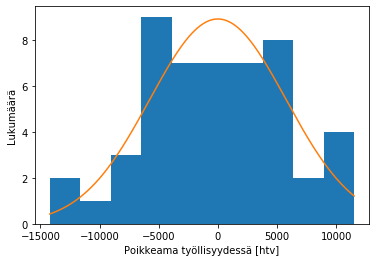

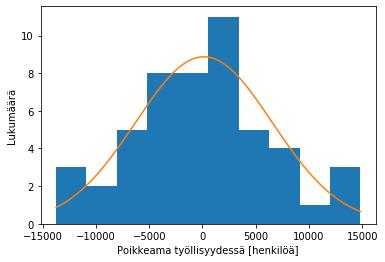

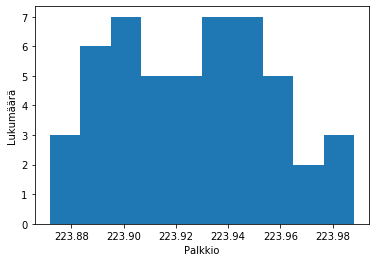

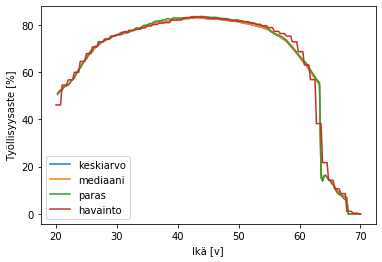

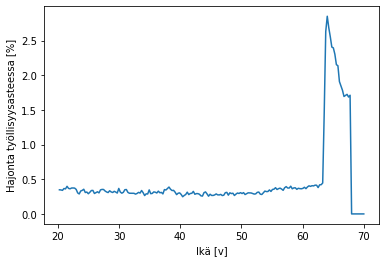

In [3]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/baseline/distrib_base_v',n=50,stats_results='results/baseline/distrib_stats')


# Putken poisto

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

best_emp 15
Vaikutus työllisyyteen keskiarvo 2071570 htv, mediaani 2071407 htv std 6340 htv
   keskiarvo 2236181 työllistä, mediaani 2236017 työllistä, std 5630 työllistä


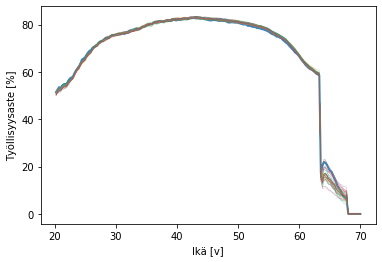

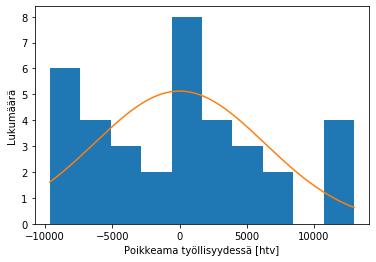

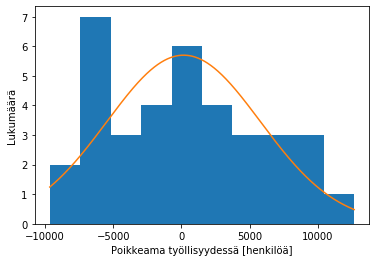

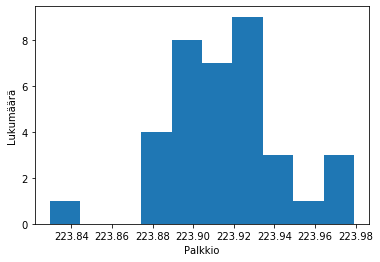

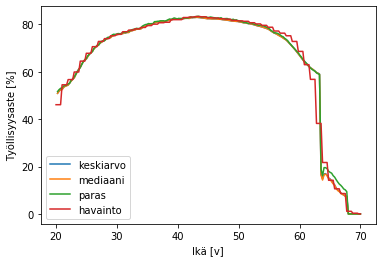

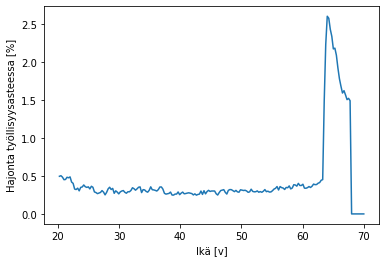

Vaikutus työllisyysasteeseen 3946.0 htv


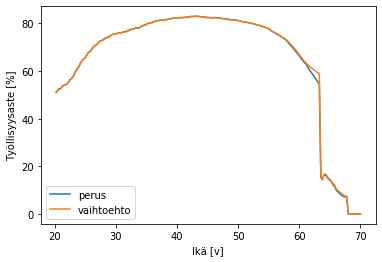

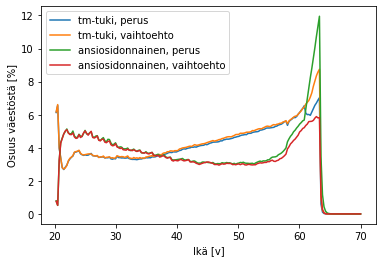

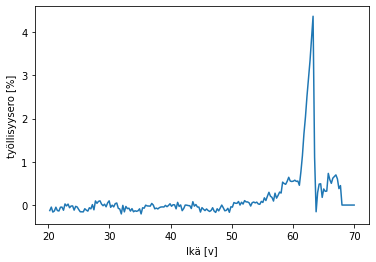

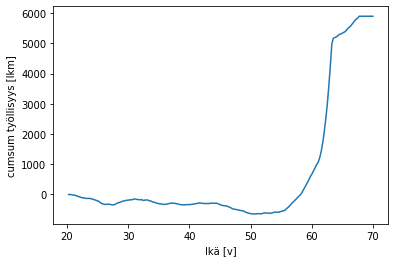

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -652.9 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 5171.1 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 4233.1 htv


In [9]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/putki/distrib_poisto_v',n=36,startn=0,stats_results='results/putki/distrib_poisto_stats')
cc2.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')


In [5]:
#cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1b.render(load='results/distrib_base_v_100')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Vaikutus työllisyysasteeseen 4131.0 htv


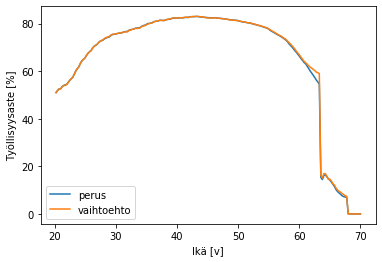

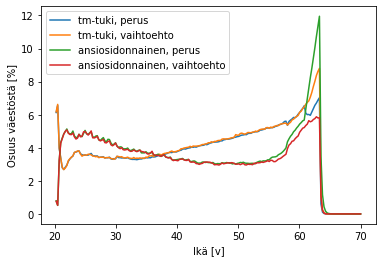

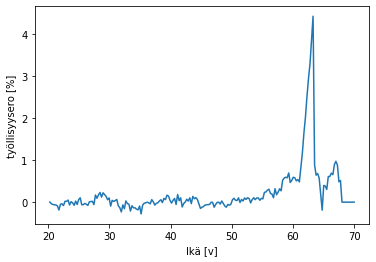

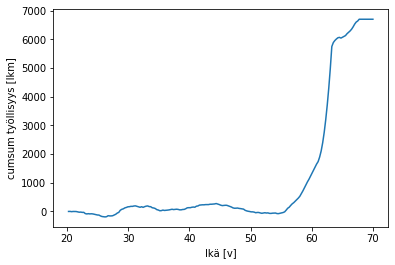

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -22.4 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 5893.7 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 4985.8 htv


In [6]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki_b.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')                    



# Porrastus

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 3
Vaikutus työllisyyteen keskiarvo 2092150 htv, mediaani 2092276 htv std 6884 htv
   keskiarvo 2260037 työllistä, mediaani 2259314 työllistä, std 6777 työllistä


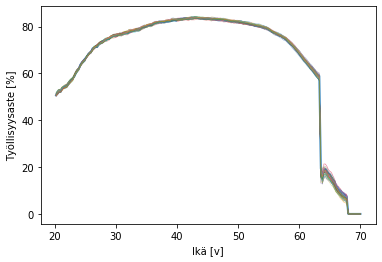

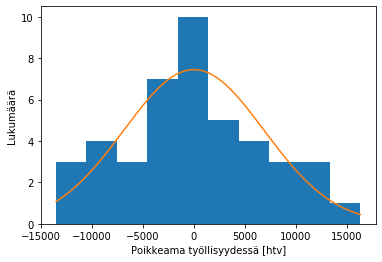

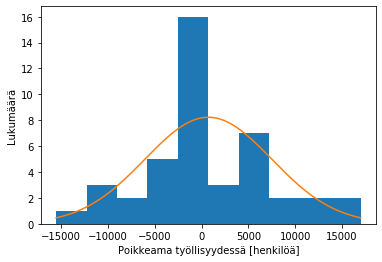

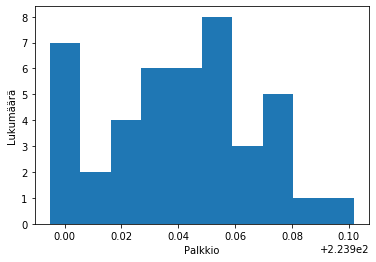

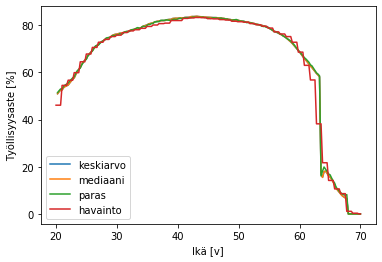

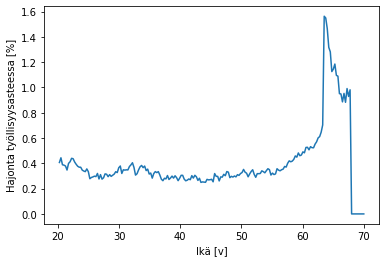

Vaikutus työllisyysasteeseen 24815.0 htv


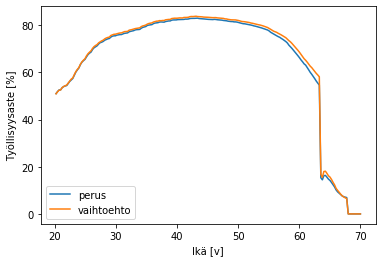

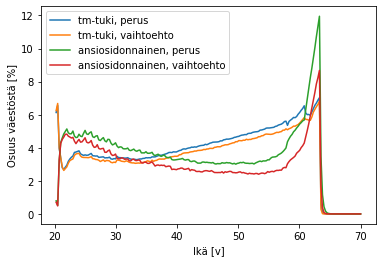

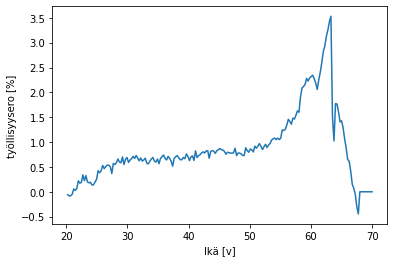

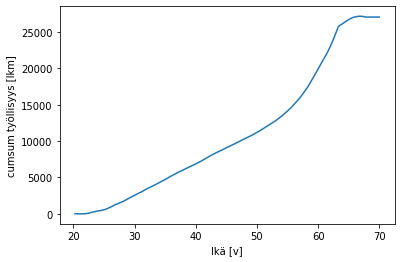

Kumulatiivinen työllisyysvaikutus 50 vuotiaana 11233.2 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 25902.5 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 25136.7 htv


In [4]:
cc1_porras_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_porras_b.render_distrib(load='results/porrastus/distrib_porras_v',n=43,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc1_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus/distrib_porras_stats')                    

# 12 kk TOE

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 5
Vaikutus työllisyyteen keskiarvo 2066513 htv, mediaani 2068644 htv std 7169 htv
   keskiarvo 2234665 työllistä, mediaani 2235197 työllistä, std 7383 työllistä


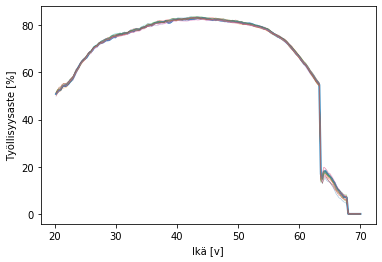

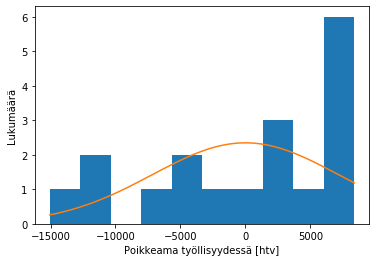

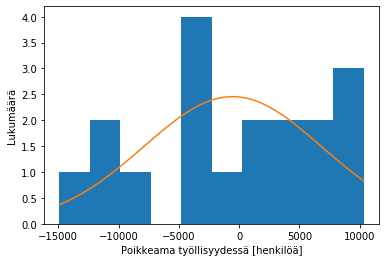

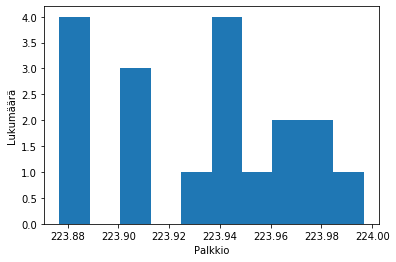

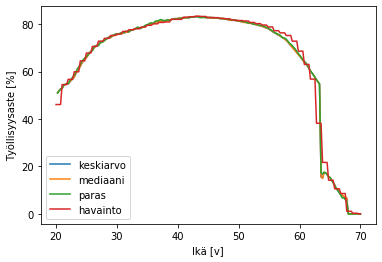

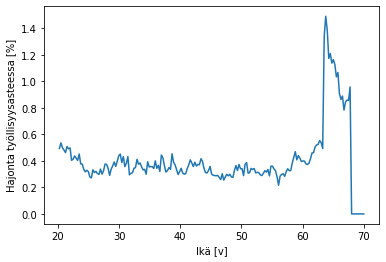

Vaikutus työllisyysasteeseen 1183.0 htv


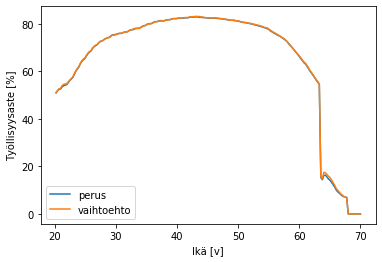

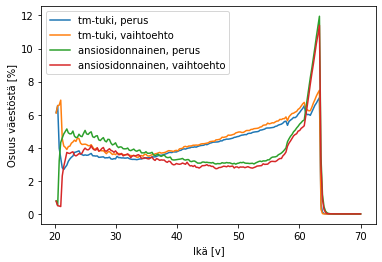

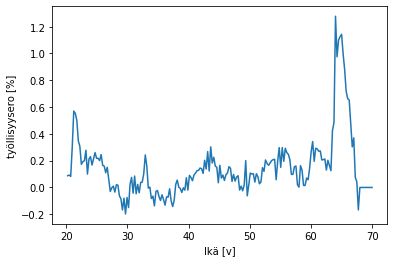

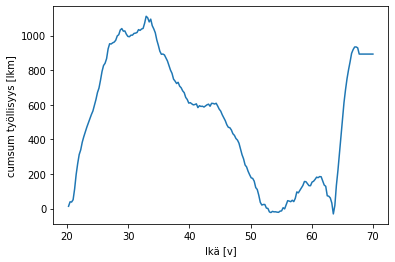

Kumulatiivinen työllisyysvaikutus 50 vuotiaana 178.0 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -30.6 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 61.6 htv


In [8]:
cc1_toe12=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_toe12.render_distrib(load='results/toe12/distrib_toe12_v',n=18,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc1_toe12.compare_distrib('results/baseline/distrib_stats','results/toe12/distrib_toe12_stats')                    

# 50 pv lyhennys

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 4
Vaikutus työllisyyteen keskiarvo 2067640 htv, mediaani 2067955 htv std 8257 htv
   keskiarvo 2235342 työllistä, mediaani 2234928 työllistä, std 8094 työllistä


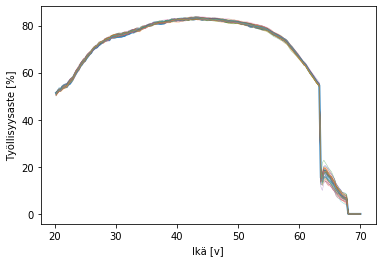

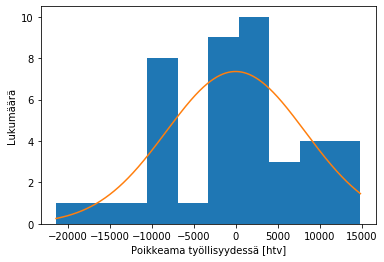

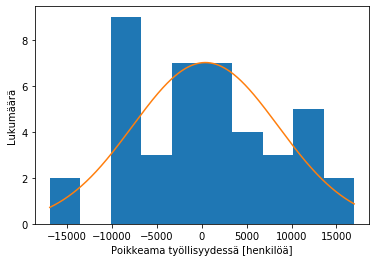

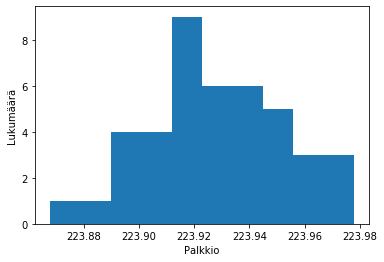

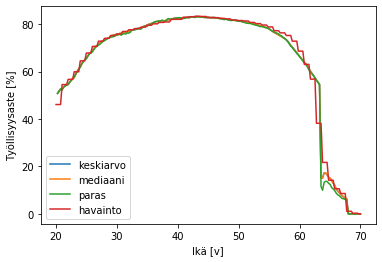

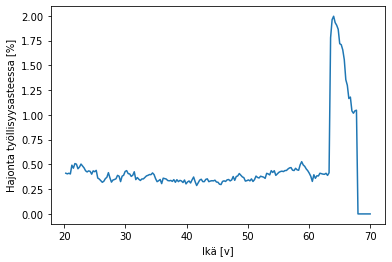

Vaikutus työllisyysasteeseen 494.0 htv


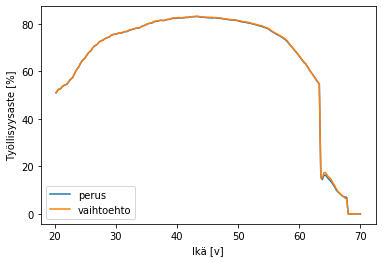

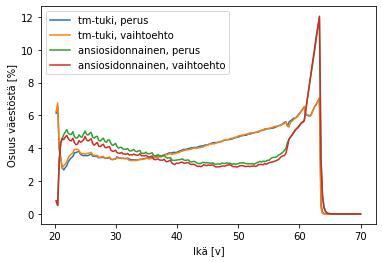

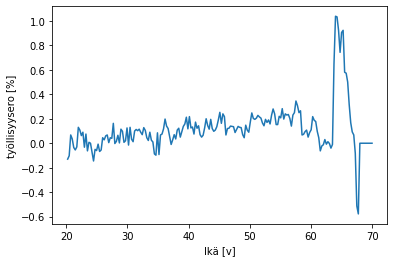

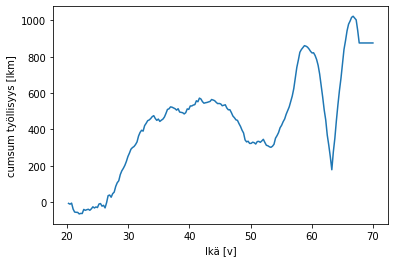

Kumulatiivinen työllisyysvaikutus 50 vuotiaana 322.9 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 276.2 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 249.8 htv


In [9]:
cc1_50_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_50_b.render_distrib(load='results/350/distrib_350_v',n=42,startn=0,stats_results='results/350/distrib_350_stats')
cc1_50_b.compare_distrib('results/baseline/distrib_stats','results/350/distrib_350_stats')                    

# Porrastus ilman vaikutusta putkeen

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 3
Vaikutus työllisyyteen keskiarvo 2091061 htv, mediaani 2092893 htv std 7286 htv
   keskiarvo 2259447 työllistä, mediaani 2260473 työllistä, std 5922 työllistä


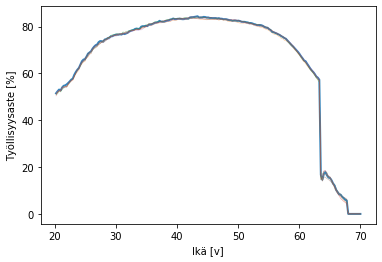

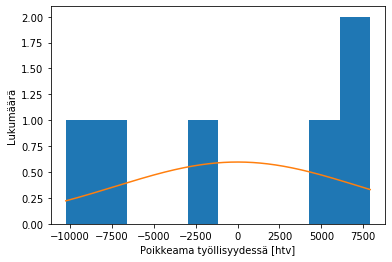

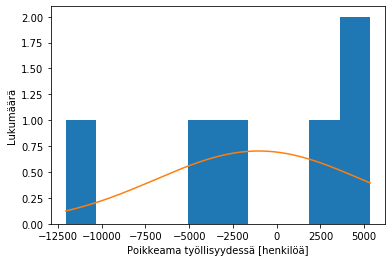

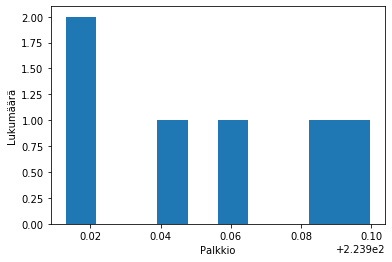

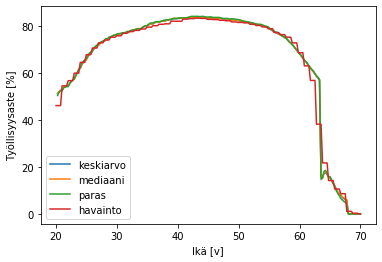

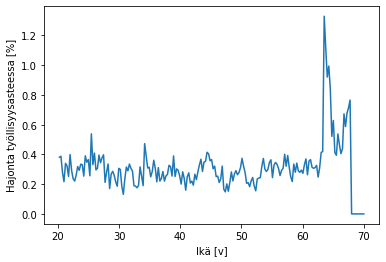

Vaikutus työllisyysasteeseen 25432.0 htv


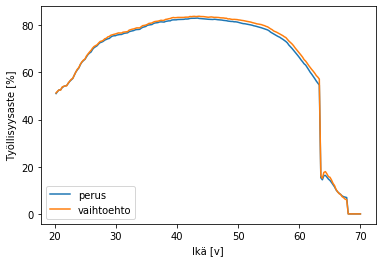

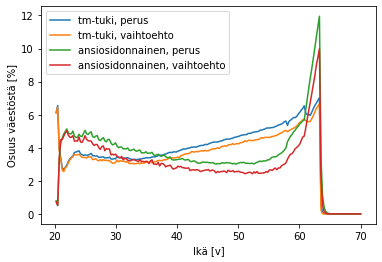

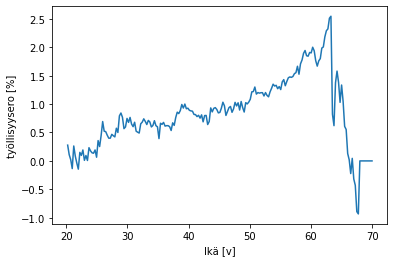

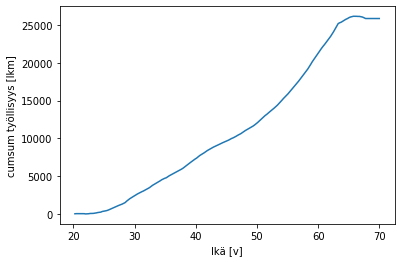

Kumulatiivinen työllisyysvaikutus 50 vuotiaana 12093.1 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 25316.3 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 24850.2 htv


In [6]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_eiputki/distrib_porras_v',n=6,startn=0,stats_results='results/porrastus_eiputki/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

Vaikutus työllisyysasteeseen 617.0 htv


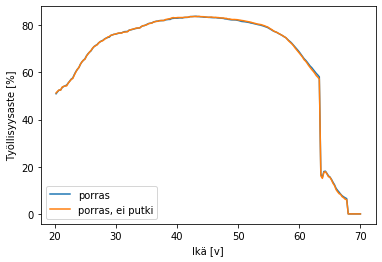

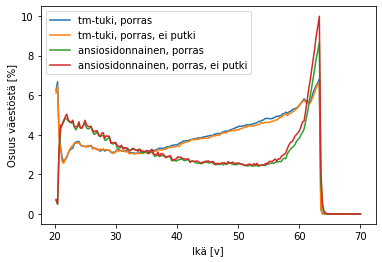

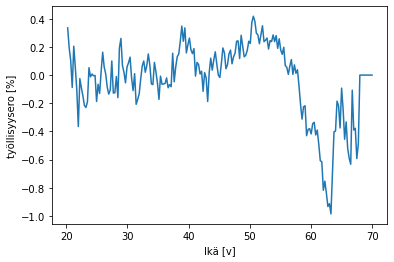

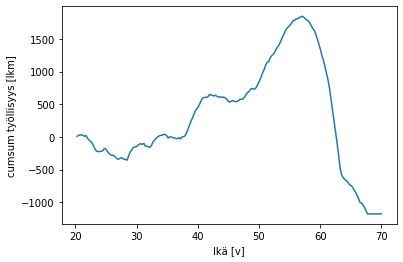

Kumulatiivinen työllisyysvaikutus 50 vuotiaana 859.9 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -586.2 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -286.4 htv


In [7]:
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_eiputki/distrib_porras_stats',label1='porras',label2='porras, ei putki')